In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# Definición de los rangos de las variables de entrada
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

In [3]:
# Definición de las funciones de membresia
# En este caso se generan automaticamente con el metodo automf()
quality.automf(3)
service.automf(3)

C:\Users\Luis Eguia.EQUIPO-DELL\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


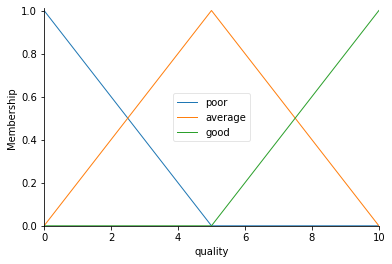

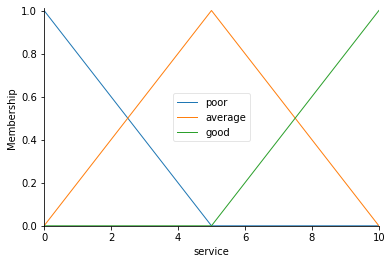

In [4]:
quality.view()
service.view()

In [ ]:
# Definiendo la variable de salida tip y el rango que tomará (0 a 25)
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [5]:
# Definiendo la función de membresía para la variable de salida
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

In [6]:
# Definiendo reglas de relación entre las variables de entrada y las de salida
r1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
r2 = ctrl.Rule(service['average'], tip['medium'])
r3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

In [7]:
# Creando controlador difuso con las reglas especificadas anteriormente
# y creando una simulación
tipping_ctrl = ctrl.ControlSystem([r1, r2, r3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [8]:
# Estableciendo valores a las entradas del controlador
# y calculando la salida
tipping.input['quality'] = 10
tipping.input['service'] = 9
tipping.compute()

Tipping: 17.012960807140086%


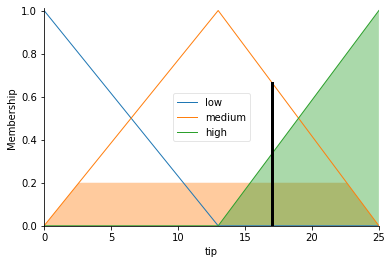

In [9]:
# Impresion del valor de tip y gráfica
print("Tipping: {0}%".format(tipping.output['tip']))
tip.view(sim=tipping)